<a href="https://colab.research.google.com/github/caiommoreno/rio_de_janeiro/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro_(Coronavirus).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise feita por: Caio Moreno**
Instagram: [@caiommoreno](https://www.instagram.com/caiommoreno/://) — onde te ajudo a ver a importância de uma boa coleta e análise de dados na sua vida e nos seus negócios ;)



---
# Análise dos dados de criminalidade do Rio de Janeiro

<center>
<img alt="Rio de Janeiro" width="80%" src="https://unsplash.com/photos/OkiDIla7K8Q/download?force=true">

*Foto tirada por [Raphael Nogueira](https://unsplash.com/@phaelnogueira) no [Unsplash](https://unsplash.com/)*
</center>


Um dos tópicos mais abordados nos noticiários do Brasil diz respeito à violência — e aqui, serão abordados os seus mais variados casos do Rio de Janeiro.

Os hábitos de **coleta de dados**, e leis que permeiam o acesso à informação e conscientização da população vem aumentado ano a ano. **(Apesar de se ter muito a melhorar!)**

Parabenizando o governo do estado do Rio de Janeiro por trazer a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/), que por sua vez tem uma base de dados completa para esse artigo ter sido criado.

Lembre-se: sem uma base de dados, e uma boa coleta de informações, é **impossível** identificar, parametrizar e principalmente **resolver** problemas.
  

## Obtenção dos Dados

Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

Os números divulgados no portal são constituídas pelos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

A base de dados — ou seja, o *dataset* — a ser utilizado neste artigo, foi o arquivo `csv` que pode ser baixado diretamente [neste link](http://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv).

No portal do ISPDados há muitas outras base de dados para serem utilizados publicamente.

# Analisando a Violência no Rio de Janeiro


<center>
<img alt="Rio de Janeiro" width="80%" src="https://unsplash.com/photos/T1u5YP4blL4/download?force=true">

*Foto tirada por [Randy Colas](https://unsplash.com/@randycolasbe) no [Unsplash](https://unsplash.com/)*
</center>


A partir daqui, será feita uma análise exploratória de dados, tentando buscar padrões de criminalidade e observando pontos que podem ser melhorados referente aos registros.

Lembrando que para uma conclusão mais assertiva, seria necessário o cruzamento de informações de outras fontes.

## Extração dos Dados

É muito improvável extrair uma base de dados de alguma fonte e eles estarem perfeitos para uma boa análise — ainda mais se for feita um modelo matemático ou estatístico de aprendizagem de máquinas.

Então, aqui importaremos os pacotes necessários para a extração, e o modelamento do arquivo — linhas, colunas, datas, e pequenos detalhamentos de decimais, etc.


*PS: O formato da data foi convertido para o padrão americano, para ter um mais fácil manejamento dos dados.*

In [ ]:
# importa os pacotes necessários
import pandas as pd
import numpy as np

df = pd.read_csv('http://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv', sep=';')

# reorganizando dados
df.replace(',',';', inplace = True);
df.replace(' ', np.nan, inplace = True)

#criação do índice com data
df = df.assign(day='1')
df.rename(columns={'ano': 'year', 'mes': 'month'}, inplace=True)
df = df.apply(pd.to_numeric)
df['data'] = pd.to_datetime(df[['year','month','day']])
df.set_index('data', inplace = True)


## Análise Inicial dos Dados

Inicialmente, será feita uma análise para saber que tipo de dados estão sendo utilizados para ter uma breve noção da abordagem cuja tenha uma maior eficiência.

E vamos aos fatos!

<center>

![](https://1.bp.blogspot.com/-Vxak57IM92Q/XEPGTwi-aeI/AAAAAAAAAIM/nicRm0dnL7c-rXxY1Rxt8NLNd96E1CnHQCLcBGAs/s1600/tenor.gif,width="40%")

*Eu fazendo meu primeiro artigo.*

### Tamanho da base de dados
Primeiro, verificamos o quão grande é a base de dados.

In [ ]:
#análise do tamanho da base de dados
print("Colunas ou variáveis: ", df.shape[1])
print("Entradas ou número de ocorrências: ", df.shape[0])

Colunas ou variáveis:  59
Entradas ou número de ocorrências:  353


### Tipos de ocorrências

Temos em mente que são 59 colunas, ou variáveis dentro dessa base. Mas quais são elas?

In [ ]:
# Nome das colunas
df.columns

Index(['year', 'month', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_

### Tipo de variável

Em programação, caracterizamos as variáveis por ''tipos''. Ou seja: números inteiros, números decimais, escritas, entre outras coisas. 

É importante verificar-se isso, pois podem ter alguns erros na base de dados, como por exemplo números sendo identificados por escrita.

In [ ]:
#tipos de variáveis
df.dtypes

year                            int64
month                           int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veicul

Todas as variáveis são númericas nessa base de dados — ou seja, `int` de números inteiros, e `float` de números decimais.

Ora, se a base de dados refere-se ao número de ocorrências criminais de uma dada cidade, então vemos que as variáveis estão ordenadas corretamente, concorda?

<center>

![](https://media.giphy.com/media/kaeaX9qTd78enHxL9Y/giphy.gif)


##Demonstração inicial

E então finalmente, temos uma visualização inicial de como esses dados estão sendo apresentados em forma de tabela.

In [ ]:
#demonstração 5 primeiras/ultimas entradas
df.head()

,year,month,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,day
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,1991,1,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3,1
1991-02-01,1991,2,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3,1
1991-03-01,1991,3,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3,1
1991-04-01,1991,4,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3,1
1991-05-01,1991,5,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3,1


Como dito anteriormente: **é muito improvável coletar-se dados e eles estarem em perfeito estado**

Todos os valores cujo estão com a nomenclatura `NaN`na base de dados acima, são dados faltantes.

Há muitas falhas no meio do caminho — desde a coleta, armazenamento e até digitação dos dados — e existem algumas técnicas e hipóteses para contornar esse tipo de problema para continuarmos a análise.

Termos dados ausentes, corrompidos ou nulos em uma base de dados não significa que eles não estão lá — **a ausência de evidência não significa a evidência de ausência!**

Vamos aos fatos!

1.   Note que há registros desde **1991** até **2020**! Muitos dos crimes podem não ter sido contabilizados, registrados, digitados e gerenciados corretamente. ~Zero roubos de bicicletas por meses consecutivos? Desculpa Rio de Janeiro.~
2.   Atualmente, a política de dados infelizmente é muito fraca no Brasil, mas está começando a ganhar força. Logo, ainda estamos engatinhando em como utilizar essas técnicas de maneira efetiva. **Imagine em 1991!**

E então, verificaremos qual é a quantidade de dados ausentes nisso tudo, para mensurar o tamanho do problema.



In [ ]:
# ver os valores faltantes das colunas
((df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)) * 100

furto_bicicleta               78.186969
roubo_bicicleta               78.186969
apf                           50.991501
apreensao_drogas_sem_autor    50.991501
posse_drogas                  50.991501
trafico_drogas                50.991501
cmba                          50.991501
cmp                           50.991501
aaapai                        50.991501
furto_coletivo                40.793201
estupro                       40.793201
roubo_apos_saque              40.793201
extorsao                      40.793201
sequestro_relampago           40.793201
estelionato                   40.793201
roubo_conducao_saque          40.793201
furto_celular                 40.793201
pol_militares_mortos_serv     40.793201
pol_civis_mortos_serv         40.793201
roubo_cx_eletronico           40.793201
pessoas_desaparecidas         37.393768
encontro_ossada               37.393768
roubo_celular                 30.594901
ameaca                        27.195467
sequestro                     27.195467


Note que algumas variáveis têm valores faltantes consideráveis (furto de bicicletas beiram os 80%)

Neste caso em específico, os valores estão armazenados de forma cronológica, assim, pode-se fazer uma análise a partir de uma determinada data, onde não há dados faltantes em proporções muito altas.


##Informações Estatísticas da Violência no Rio de Janeiro

Inicialmente, foi utilizado o método describe() para analisar as principais características estatísticas, sendo elas:

* **count** - quantidade de entradas válidas
* **mean** - média dos valores (soma de todos os valores dividido pela quantidade de valores)
* **std** - desvio padrão (valor alto = valores espalhados | valor baixo = valores concentrados)
* **min** - menor valor da coluna 
* **25%** - primeiros 25% 
* **50%** - primeiros 50% (e mediana) 
* **75%** - primeiros 75%
* **max** - maior valor da coluna

Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar possíveis falhas na alimentação dos dados;
* Identificar *outliers* — ou seja, valores muito discrepantes da média;
* Entender melhor a distribuição dos dados, e ter conclusões poderosas para a tomada de decisão.


In [ ]:
# imprimir o resultado estatístico do DataFrame
df.describe()

,year,month,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,day
count,353.000000,353.000000,353.000000,257.000000,353.000000,269.000000,353.00000,353.000000,353.000000,209.000000,269.000000,257.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,209.000000,245.000000,209.000000,209.000000,77.000000,353.000000,353.000000,353.000000,353.000000,209.000000,209.000000,77.000000,353.000000,353.000000,257.000000,209.000000,209.000000,209.000000,353.000000,173.000000,173.000000,173.000000,353.000000,173.000000,173.000000,173.000000,173.000000,257.000000,221.000000,353.000000,221.000000,209.000000,209.000000,257.000000,353.000000,353.000000,353.000000,257.000000,353.000000,353.0
mean,2005.212465,6.450425,499.988669,4.315175,15.470255,74.349442,575.25779,319.787535,5469.810198,370.976077,210.312268,3352.424125,451.594901,131.682720,2453.660057,343.915014,3455.682720,666.563739,9.175637,3.607656,987.481633,11.095694,143.019139,11.428571,1221.130312,9514.643059,1661.067989,1514.113314,642.660287,1444.483254,133.415584,6010.082153,10450.096317,0.649805,132.363636,7.827751,2288.019139,1087.436261,612.716763,766.265896,183.641618,1769.611898,2337.317919,561.612717,1254.895954,88.364162,5480.863813,431.004525,65.175637,3.307692,2.057416,0.330144,474.108949,4807.609065,2453.660057,343.915014,53827.089494,2.994334,1.0
std,8.506192,3.461387,115.894716,2.741087,5.939070,38.389848,104.84276,126.559376,1513.119753,94.280955,54.383305,831.693075,120.866863,44.920399,785.067522,222.579681,2448.266305,300.853024,10.507182,2.638316,637.446839,6.388122,55.792969,7.792420,793.334415,4575.525617,303.799736,965.227077,268.979561,383.555408,81.722791,1955.155664,3682.175666,0.952961,42.858464,5.035355,806.049537,642.739465,242.023989,306.389133,37.193537,651.222949,640.023489,243.734857,363.284581,69.317942,1132.093112,69.597512,34.703006,2.265429,1.747678,0.628720,92.513617,3212.655005,785.067522,222.579681,11075.265478,0.075164,0.0
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.000000,334.00000,122.000000,2350.000000,188.000000,111.000000,590.000000,169.000000,46.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,904.000000,255.000000,23.000000,304.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,106.000000,729.000000,1173.000000,225.000000,544.000000,2.000000,1409.000000,178.000000,0.000000,0.000000,0.000000,0.000000,279.000000,1086.000000,1097.000000,59.000000,30621.000000,2.000000,1.0
25%,1998.000000,3.000000,406.000000,2.000000,11.000000,43.000000,499.00000,201.000000,4069.000000,282.000000,175.000000,2974.000000,363.000000,100.000000,1890.000000,212.000000,1059.000000,436.000000,2.000000,2.000000,554.000000,6.000000,98.000000,4.000000,817.000000,5203.000000,1423.000000,733.000000,501.000000,1291.000000,84.000000,4001.000000,6705.000000,0.000000,107.000000,5.000000,1690.000000,727.000000,372.000000,463.000000,157.000000,1277.000000,1718.000000,334.000000,949.000000,46.000000,4835.000000,387.000000,41.000000,2.000000,1.000000,0.000000,396.000000,1592.000000,1890.000000,212.000000,45403

# Delitos Pós Coronavirus

Essa seção do projeto será para investigar e comparar os dados referentes aos crimes após o Coronavírus divididos em duas partes: **roubos e furtos e crimes contra a vida**.

Seguindo a lógica e o senso comum, se há menos pessoas circulando nas ruas, logo, teremos uma menor taxa de crimes — **mas será se isso é realmente verdade?**

O objetivo de um cientista é sempre questionar os fatos, apesar de parecer uma obviedade. **Lidamos com probabilidades, e não achismos**.

Pelo senso comum isso é algo extremamente óbvio, mas para se comprovar fatos, é necessário apresentar **dados**.

Serão analisados os dados do ano de **2019** e **2020** (até o mês que o governo disponibilizou para nós: Maio).

## Roubos e Furtos

Aqui serão colocados todos os dados referentes à roubos, furtos e recuperação do patrimônio.

Portanto, é possível utilizar essas informações para mensurar a efetividade do combate ao crime, e a sua evolução no tempo.




In [ ]:
#filtro dos dados do ano de 2019 até 2020
df_new = df.tail(17)

#filtro de colunas apenas de roubos e furtos
df_roubos_furtos = df_new.iloc[:,12:33]

print("Número de colunas: {}".format(df_roubos_furtos.shape[1]))

Número de colunas: 21


Agora, analisaremos de maneira rápida — sem muita complexidade —, com gráficos de linha a evolução no tempo referentes à essas 21 variáveis.

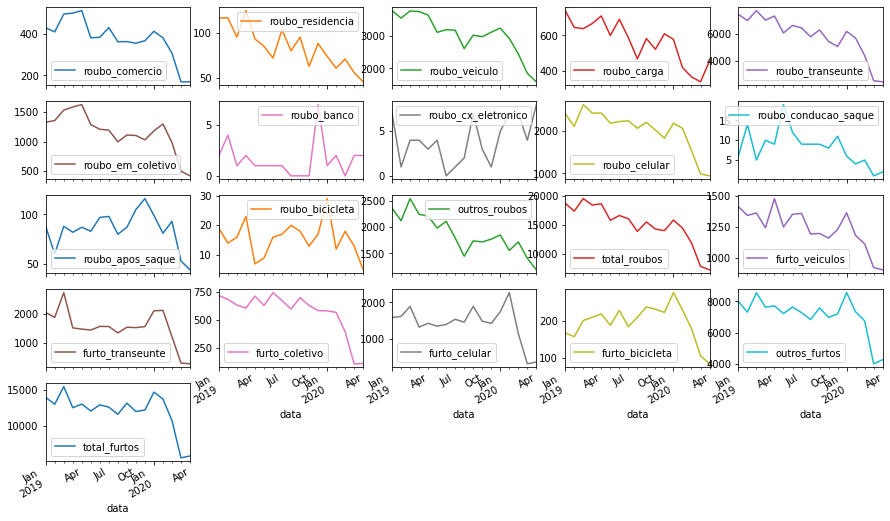

In [ ]:
df_roubos_furtos.plot.line(subplots=True, layout=(21,5), figsize=(15,40),);

Note como é extremamente simples ter uma rápida visualização e noção dos dados ao longo do tempo, com apenas uma linha de código no Python.

Lembrando que o objetivo nesse primeiro momento é apenas ter uma rápida visualização e noção do que os dados podem nos dizer, não sendo inteiramente no design e manejamento dos gráficos.

E sim: **houve um decaimento brusco dos dados a partir de Fevereiro na maioria dos casos**

Agora, vejamos a distribuição dos valores quantitativos nas variáveis, por meio de **histogramas**.

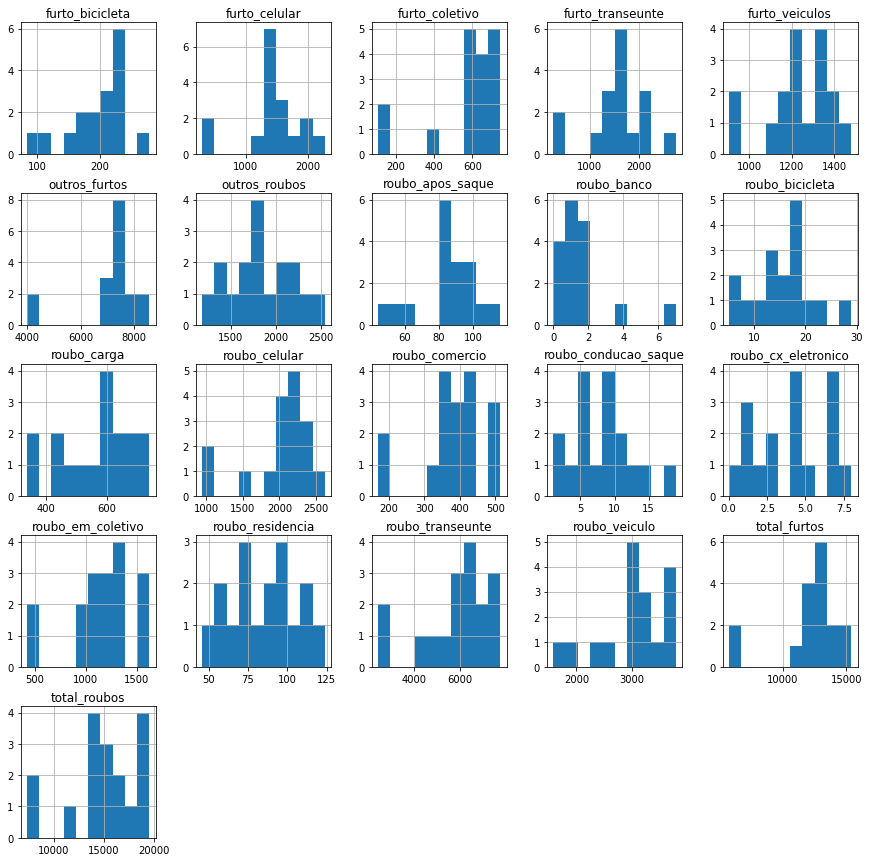

In [ ]:
df_roubos_furtos.hist(figsize=(15,15));

Nos gráficos acima, podemos fazer análises do tipo:

* Houveram 4 meses com 15 mil e 20 mil roubos totais
* Roubo de celulares acontecem maior volume (acima de 2000 registros) em maior frequência (em 3,4 e 5 meses)
* Mais de 600 registros de furto coletivo tiveram com uma frequência de 4 e 5 meses.

Entre outras possíveis análises

##Crimes contra a vida

Assim como no tópico de 'Roubos e Furtos', aqui serão colocados todos os dados referentes à crimes contra a vida.

In [ ]:
#filtro de colunas apenas crimes contra a vida
df_vida = df_new.iloc[:,2:12]
df_vida['sequestro'] = df_new['sequestro']
df_vida['extorsao'] = df_new['extorsao']
df_vida['sequestro_relampago'] = df_new['sequestro_relampago']
df_vida['estelionato'] = df_new['estelionato']

print("Número de colunas: {}".format(df_vida.shape[1]))

Número de colunas: 14


Da mesma maneira, analisaremos os gráficos de linha e a evolução no tempo referentes à essas 14 variáveis.

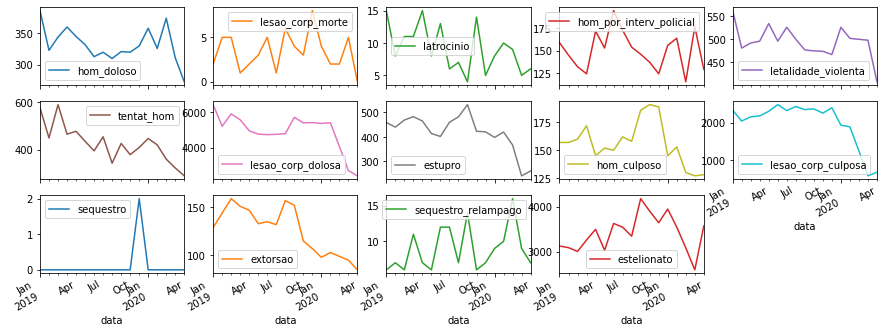

In [ ]:
df_vida.plot.line(subplots=True, layout=(21,5), figsize=(15,40),);

Novamente, houve uma queda brusca na maior parte dos registros referentes à vida.

Porém, alguns resultados tiveram um leve aumento no mês de **março/abril.**

E por fim: o histograma.

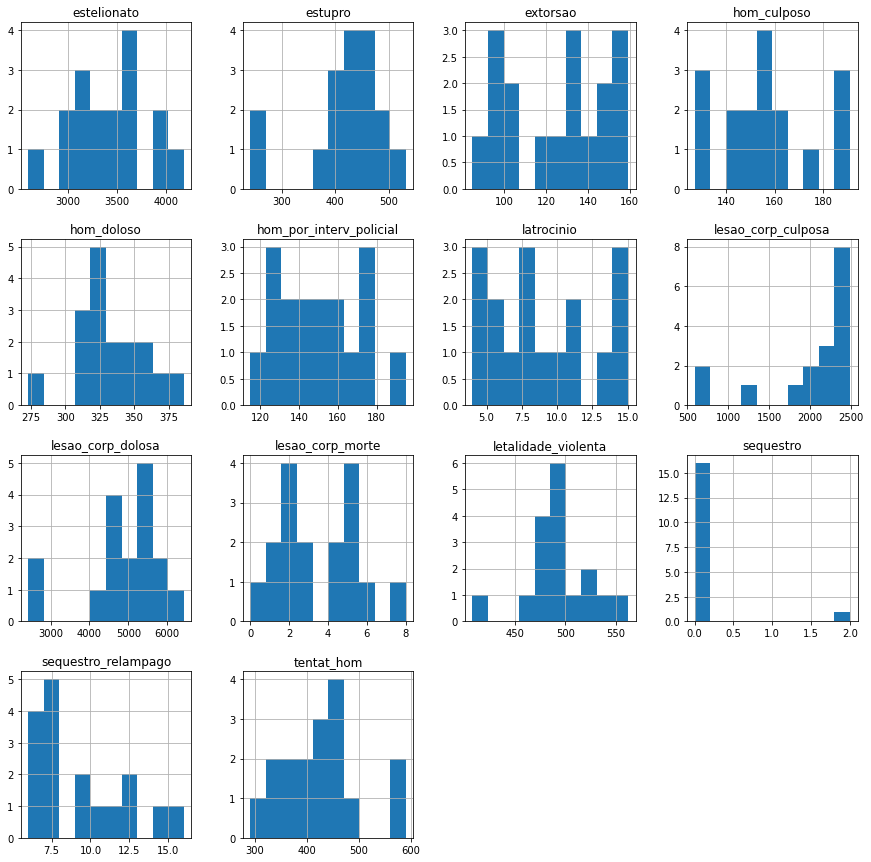

In [ ]:
df_vida.hist(figsize=(15,15));

* Apenas um mês tiveram dois registros de sequestro (provavelmente uma má alimentação de dados);
* Em apenas um mês tiveram poucos casos de letalidade violenta, o restante dos meses com 450 - 550 casos;
* Casos de estupro em apenas 2 meses tiveram poucos casos, o restante dos meses com 350 - 550 casos.

Entre outros  tipos de análises pertinentes.


## Conclusão

Esse artigo foi apenas uma análise de dados simples, demonstrando a eficiência e a importância da coleta de dados correta.

Ao se coletar dados reais, extraído diretamente de sites e portais com dados abertos, é necessário ter um processamento de dados prévio.

Esta é a etapa que mais consome tempo em uma análise: **aquisição, tratamento e exploração dos dados.**

Também comprovamos que houve sim uma diminuição bem considerável no número de casos registrados durante o coronavírus segundo essa base de dados.

Espero que tenha gostado, e caso desejar saber um pouco mais sobre meu trabalho, aqui está o link do meu [Linkedin](https://www.linkedin.com/in/caio-m-moreno-293364156/) e meu [Instagram](https://instagram.com/caiommoreno), onde compartilho diariamente informações relevantes sobre dados, tecnologias e inteligência artificial.

